<center>

# Aprendizaje No Supervisado DiploDatos 2024
## Georgina Flesia y Laura Alonso Alemany


## Agrupamiento con el FIFA 2019 dataset

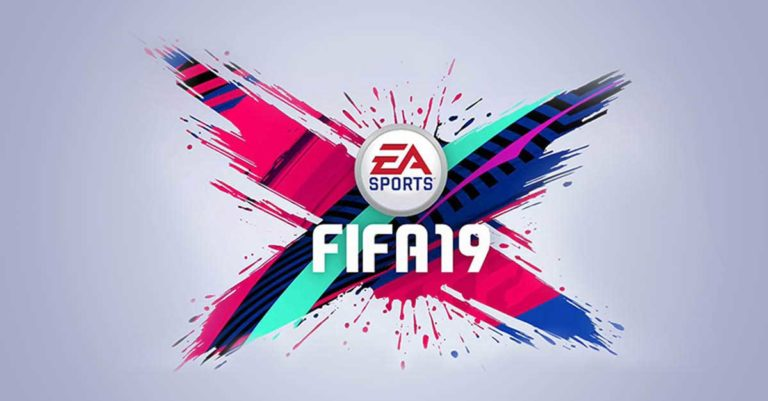
    
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros.

### Indice de temas
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Exploración de la base](#2.-Exploración-de-la-base)
3. [Preparación de los datos a analizar](#3.-Preparación-de-los-datos-a analizar)
4. [Exploración Visual](#4.-Exploratorio-Visual-para-Clustering)


## 1.-Inicialización-del-entorno

**Empezamos cargando algunas herramientas para cargar los datos y manipularlos.**

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

**Para visualización usaremos principalmente plotly, también seaborn y matplotlib.**

In [ ]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

## 2.-Exploración-de-la-base

**Cargamos los datos bajados de la database de [Kaggle] como 'data.csv'.**

In [ ]:
url='https://raw.githubusercontent.com/DiploDatos/AprendizajeNOSupervisado/master/2021/data.csv'

In [ ]:
df=pd.read_csv(url)
df.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,8

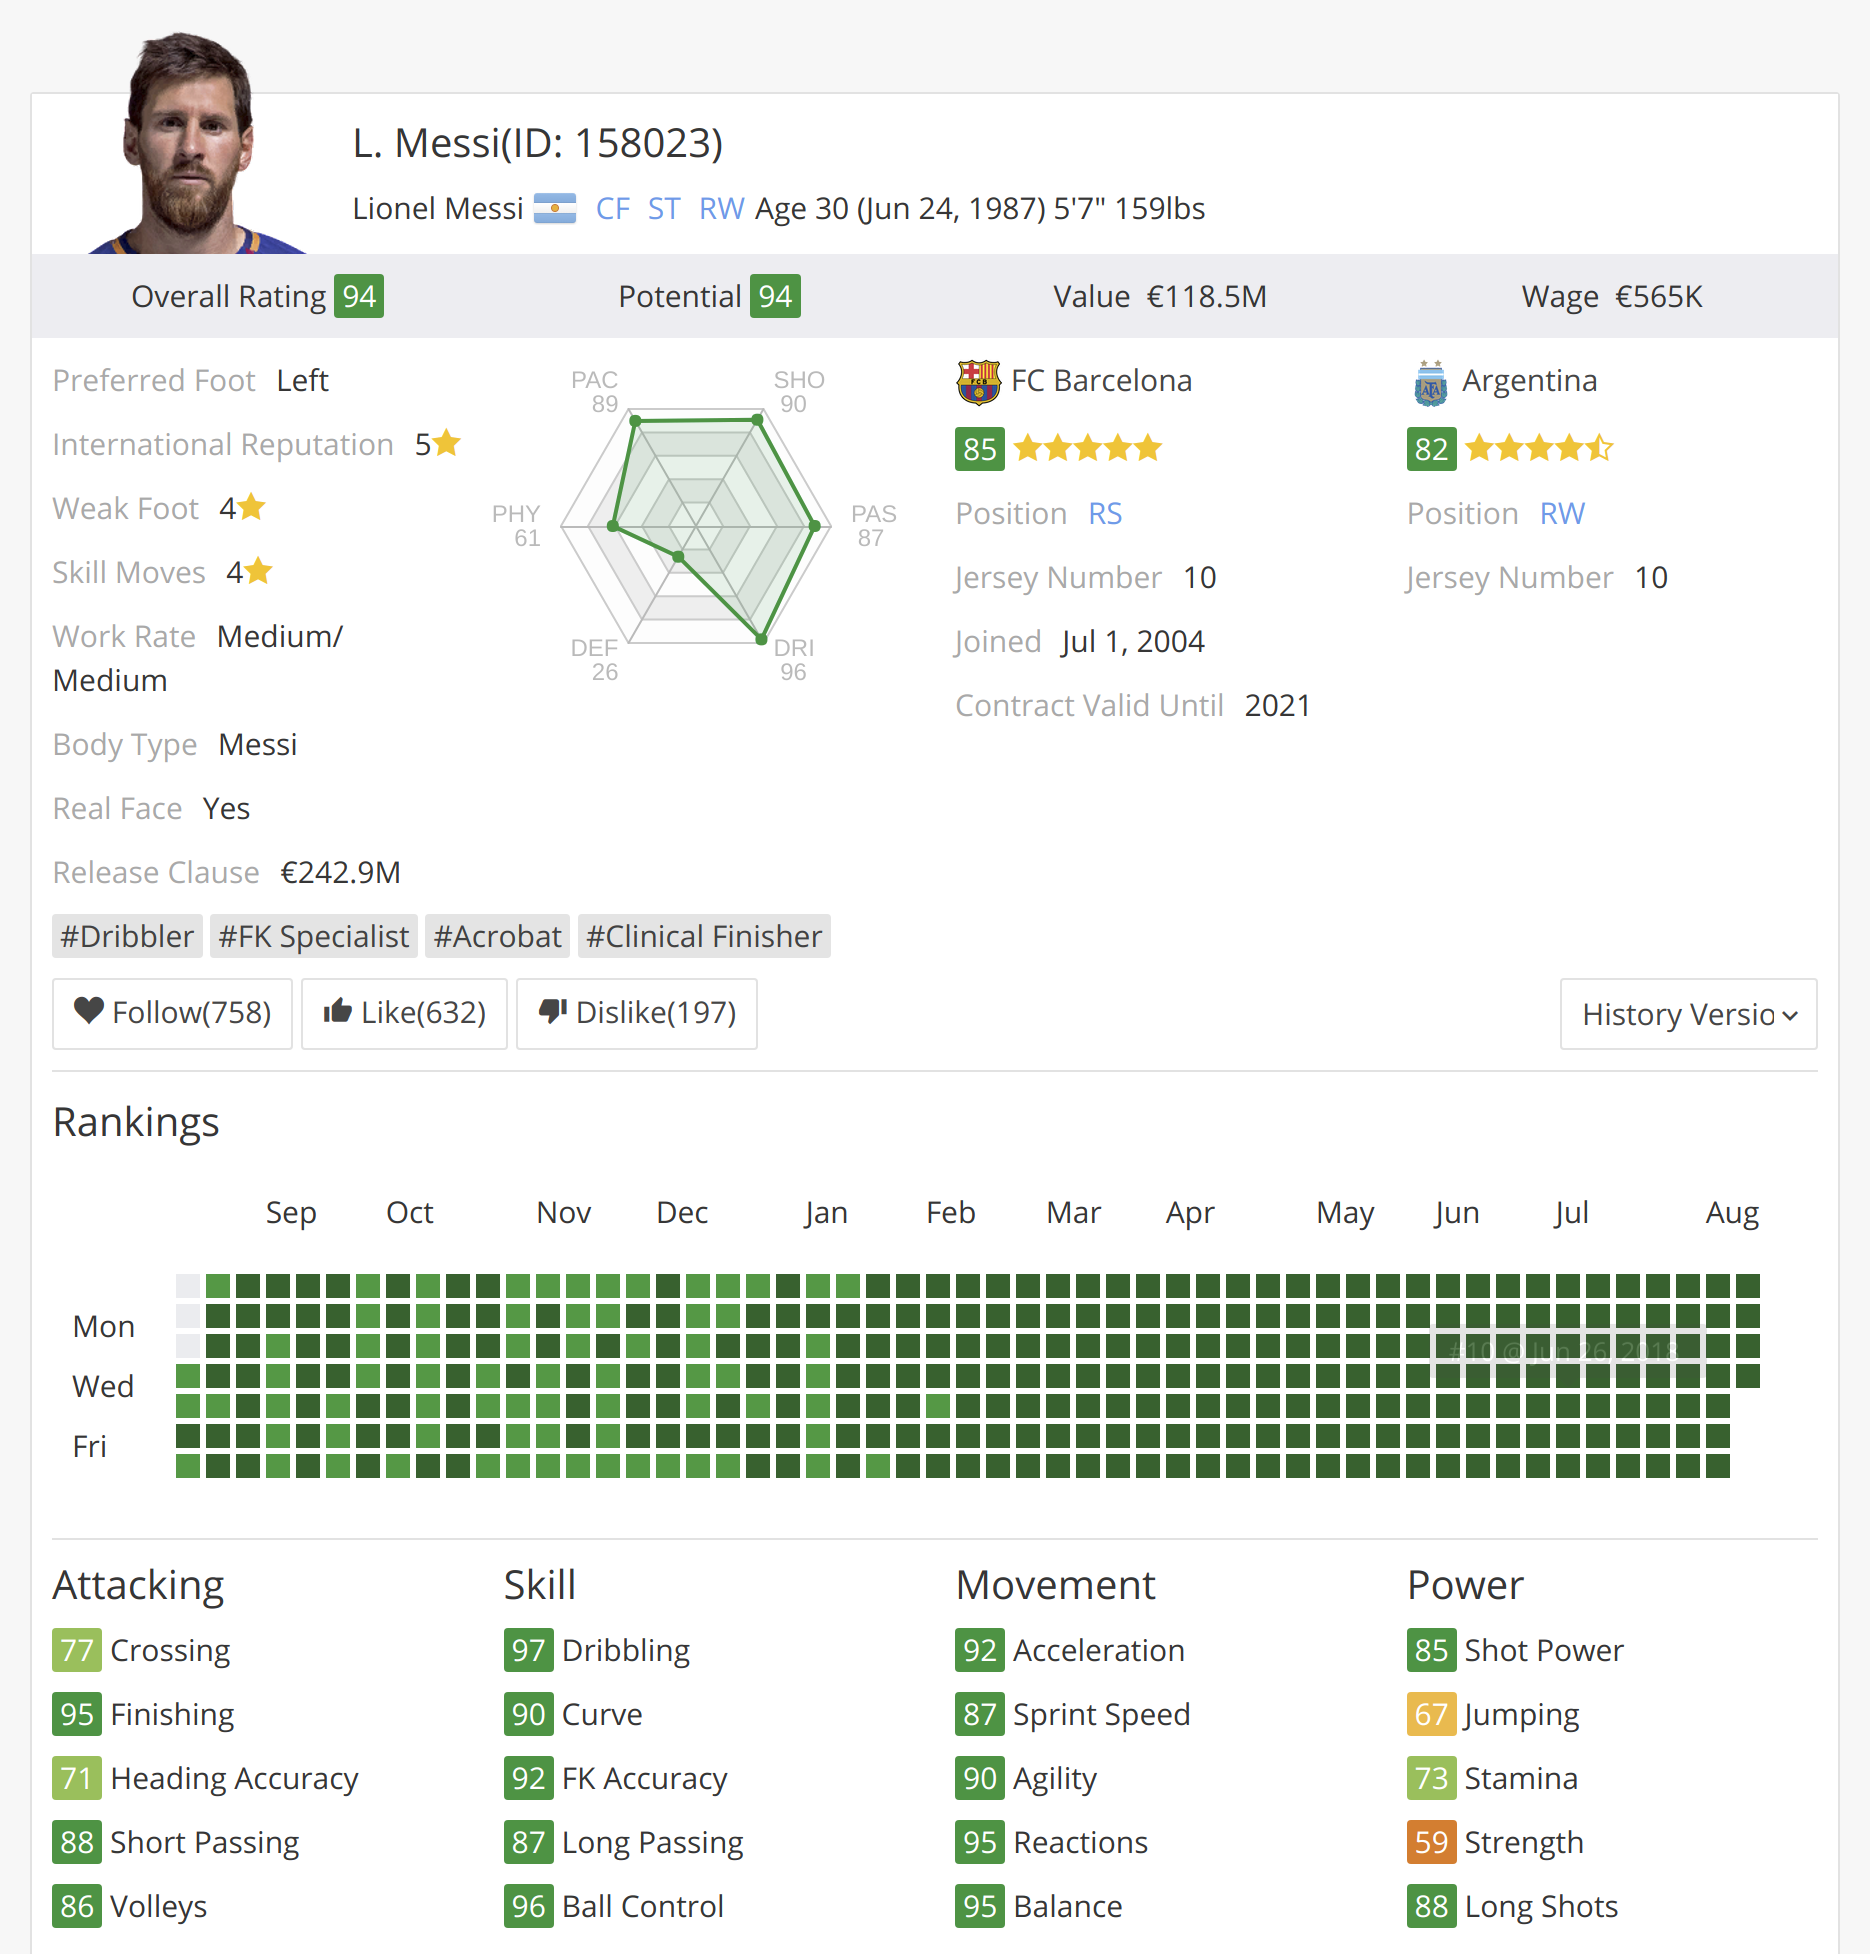

Cuantas variables y cuantos casos hay?

In [ ]:
df.shape


(18207, 89)

Los últimos casos son ...

In [ ]:
df.tail(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18197,18197,246167,D. Holland,18,https://cdn.sofifa.org/players/4/19/246167.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,47,61,Cork City,https://cdn.sofifa.org/teams/2/light/422.png,€60K,€1K,1362,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,CM,14.0,"Oct 5, 2018",NaN,2018,5'10,141lbs,45+2,45+2,45+2,49+2,48+2,48+2,48+2,49+2,49+2,49+2,49+2,49+2,47+2,47+2,47+2,49+2,45+2,44+2,44+2,44+2,45+2,44+2,40+2,40+2,40+2,44+2,44.0,44.0,36.0,53.0,43.0,50.0,48.0,46.0,52.0,51.0,68.0,62.0,58.0,41.0,62.0,50.0,55.0,50.0,38.0,37.0,37.0,28.0,39.0,48.0,49.0,52.0,41.0,47.0,38.0,13.0,6.0,9.0,10.0,15.0,€88K
18198,18198,242844,J. Livesey,18,https://cdn.sofifa.org/players/4/19/242844.png,England,https://cdn.sofifa.org/flags/14.png,47,70,Burton Albion,https://cdn.sofifa.org/teams/2/light/15015.png,€60K,€1K,792,Right,1.0,2.0,1.0,Medium/ Medium,Lean,No,GK,22.0,"Nov 10, 2018",NaN,2021,5'11,154lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,8.0,14.0,19.0,8.0,10.0,13.0,10.0,21.0,11.0,18.0,24.0,22.0,36.0,47.0,26.0,56.0,20.0,38.0,5.0,25.0,6.0,5.0,37.0,14.0,34.0,15.0,11.0,13.0,46.0,52.0,58.0,42.0,48.0,€165K
18199,18199,244677,M. Baldisimo,18,https://cdn.sofifa.org/players/4/19/244677.png,Canada,https://cdn.sofifa.org/flags/70.png,47,69,Vancouver Whitecaps FC,https://cdn.sofifa.org/teams/2/light/101112.png,€70K,€1K,1303,Right,1.0,3.0,2.0,Medium/ High,Lean,No,CM,65.0,"Jul 17, 2018",NaN,2021,5'6,150lbs,42+2,42+2,42+2,43+2,44+2,44+2,44+2,43+2,44+2,44+2,44+2,45+2,45+2,45+2,45+2,45+2,47+2,48+2,48+2,48+2,47+2,47+2,48+2,48+2,48+2,47+2,31.0,31.0,41.0,51.0,26.0,46.0,35.0,31.0,55.0,47.0,60.0,63.0,53.0,46.0,55.0,49.0,57.0,42.0,43.0,30.0,53.0,49.0,35.0,40.0,36.0,40.0,48.0,49.0,49.0,7.0,7.0,9.0,14.0,15.0,€175K
18200,18200,231381,J. Young,18,https://cdn.sofifa.org/players/4/19/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,47,62,Swindon Town,https://cdn.sofifa.org/teams/2/light/1934.png,€60K,€1K,1203,Left,1.0,2.0,2.0,Medium/ Medium,Lean,No,ST,21.0,"Oct 17, 2015",NaN,2019,5'9,157lbs,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,44+2,44+2,41+2,37+2,37+2,37+2,41+2,31+2,28+2,28+2,28+2,31+2,30+2,27+2,27+2,27+2,30+2,28.0,47.0,47.0,42.0,37.0,39.0,32.0,25.0,30.0,41.0,65.0,48.0,64.0,54.0,80.0,44.0,77.0,31.0,31.0,51.0,26.0,16.0,46.0,37.0,58.0,50.0,15.0,17.0,14.0,11.0,15.0,12.0,12.0,11.0,€143K
18201,18201,243413,D. Walsh,18,https://cdn.sofifa.org/players/4/19/243413.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,47,68,Waterford FC,https://cdn.sofifa.org/teams/2/light/753.png,€60K,€1K,1098,Left,1.0,3.0,2.0,Medium/ Medium,Lean,No,RB,29.0,"Apr 20, 2018",NaN,2018,6'1,168lbs,32+2,32+2,32+2,29+2,30+2,30+2,30+2,29+2,28+2,28+2,28+2,30+2,30+2,30+2,30+2,30+2,39+2,38+2,38+2,38+2,39+2,42+2,46+2,46+2,46+2,42+2,22.0,23.0,45.0,25.0,27.0,21.0,21.0,27.0,27.0,32.0,52.0,52.0,39.0,43.0,48.0,39.0,74.0,39.0,52.0,16.0,44.0,45.0,20.0,31.0,38.0,43.0,44.0,47.0,53.0,9.0,10.0,9.0,11.0,13.0,€153K
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,No,CM,22.0,"May 3, 2017",NaN,2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+

In [ ]:

print(len(df.columns), 'variables')

89 variables


In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
ID,int64
Name,object
Age,int64
Photo,object
Nationality,object
Flag,object
Overall,int64
Potential,int64
Club,object


In [ ]:
print(df.describe())

         Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031   

In [ ]:
print(df.Crossing)

0        84.0
1        84.0
2        79.0
3        17.0
4        93.0
         ... 
18202    34.0
18203    23.0
18204    25.0
18205    44.0
18206    41.0
Name: Crossing, Length: 18207, dtype: float64


89.0
[84. 79. 17. 93. 81. 86. 77. 66. 13. 62. 88. 55. 68. 82. 75. 15. 14. 70.
 58. 78. 52. 90. 64. 87. 60. 12. 69. 46. 30. 80. 11. 57. 83. 85. 20. 73.
 53. 72. 36. 44. 45. 40. 27. 76. 63. 65. 48. 61. 47. 89. 19. 49.  9. 71.
 74. 24. 18. 38. 92. 56. 67. 35. 25. 50. 29. 10. 42. 54. 59. 91. 51. 43.
 33. 34. 16. 39. 28.  8. 21. 23. 41. 32. 37. 31. 22.  7. 26.  6.  5. nan]


<Axes: >

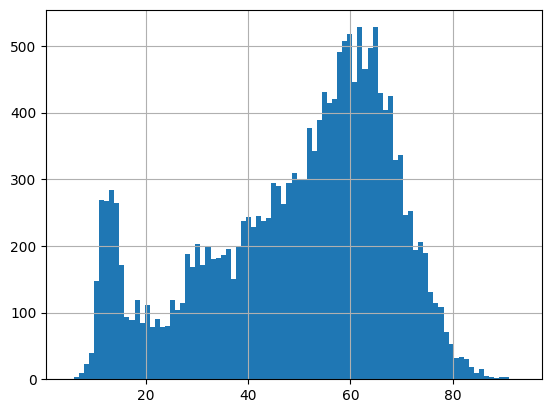

In [ ]:
print(df.Crossing.max()-df.Crossing.min()+1)
nbins=89
print(df['Crossing'].unique())
df['Crossing'].hist(bins = nbins)

In [ ]:
print(df.Overall)

0        94
1        94
2        92
3        91
4        91
         ..
18202    47
18203    47
18204    47
18205    47
18206    46
Name: Overall, Length: 18207, dtype: int64


**Realizamos el histograma de la variable "Overall" (Desempeño global)**

49


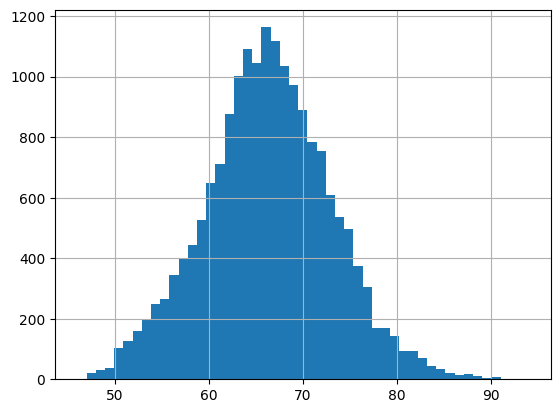

In [ ]:
nbins=1*(df.Overall.max()-df.Overall.min())+1
df['Overall'].hist(bins = nbins)
print(nbins)

La variable **'Overall'** se calcula usando otras variables de desempeño del jugador (skills_ratings), utilizando redondeo

La variable 'Overall' es numérica discreta, (pero de "naturaleza" continua) así como las otras de desempeño según habilidad ('Crossing',
       'Finishing', 'HeadingAccuracy', etc.), tomando valores enteros entre 0 y 100, más allá del tipo de dato en estos casos.
       
Miramos ahora los mejores jugadores por posicion, usando las variables 'Overall' y 'Position'.

Mejores jugadores por posición:

In [ ]:
best_players_per_position=df.iloc[df.groupby(df['Position'])['Overall'].idxmax()][['Position','Name','Overall']]
best_players_per_position

,Position,Name,Overall
17,CAM,A. Griezmann,89
12,CB,D. Godín,90
20,CDM,Sergio Busquets,89
271,CF,Luis Alberto,82
67,CM,Thiago,86
3,GK,De Gea,91
28,LAM,J. Rodríguez,88
35,LB,Marcelo,88
24,LCB,G. Chiellini,89
11,LCM,T. Kroos,90


Conteos por posiciones

In [ ]:
pd.DataFrame(df.Position.value_counts().sort_index())

,count
Position,
CAM,958
CB,1778
CDM,948
CF,74
CM,1394
GK,2025
LAM,21
LB,1322
LCB,648


Mejores Promedios de Overall por equipos

In [ ]:
club_avg_overall=df.groupby("Club")["Overall"].mean().reset_index().sort_values("Overall",ascending=False)
club_avg_overall.head(8)

,Club,Overall
326,Juventus,82.280000
398,Napoli,80.000000
315,Inter,79.750000
470,Real Madrid,78.242424
382,Milan,78.074074
212,FC Barcelona,78.030303
435,Paris Saint-Germain,77.433333
482,Roma,77.423077


## 3.-Preparación-de-los-datos-a analizar

**Reducimos el tamaño de la base. Retiramos jugadores con bajo Desempeño global ("Overall"),**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [ ]:
n=10000 #cantidad de jugadores a considerar

df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['Overall']>70)]

skills_ratings = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
                  'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
                  'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                  'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                  'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                  'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
                  'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

34 variables numéricas de desempeño según habilidad


In [ ]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'

    elif position in midfielders:
        return 'Midfielder'

    elif position in defenders:
        return 'Defender'

    elif position in goalkeepers:
        return 'GK'

    else:
        return 'nan'

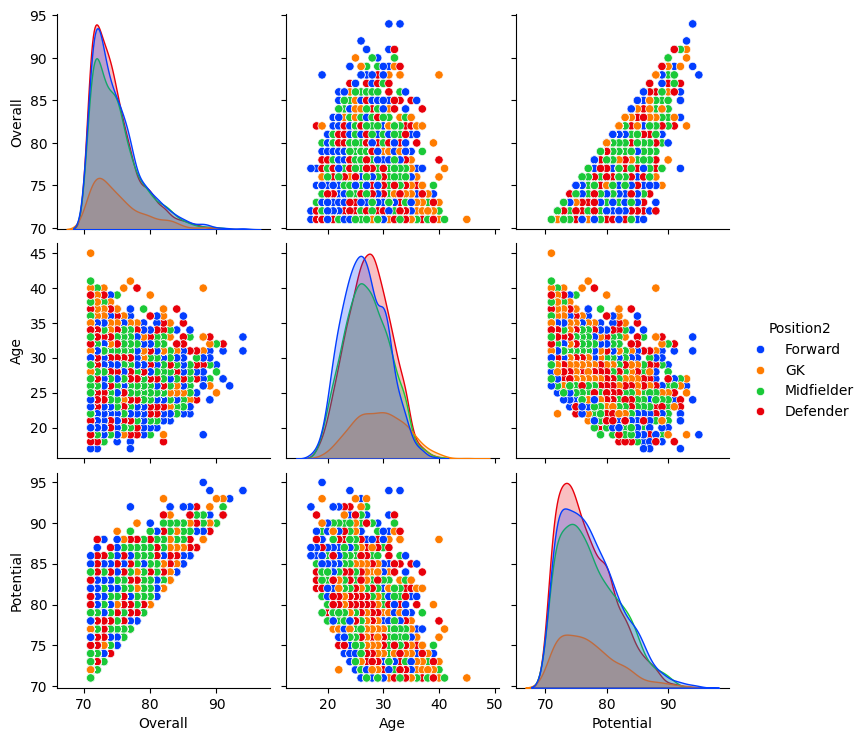

In [ ]:
df_n["Position2"]=df_n["Position"].apply(lambda x: pos2(x))

df_n["Position2"].value_counts()

data_temp = df_n.loc[:,["Position2",'Overall','Age','Potential']]
sns.pairplot(data_temp, hue="Position2",palette='bright')

**Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización**

In [ ]:
MachineGunDict={'Name':'MachineGun','Overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
df_n = pd.concat([df_n, pd.DataFrame([MachineGunDict])], ignore_index=True)

In [ ]:
JugadorPromedioDict={'Name':'JugadorPromedio','Overall':df_n.Overall.mean()}
for skills in skills_ratings:
    JugadorPromedioDict[skills]=df_n[skills].mean()

df_n = pd.concat([df_n, pd.DataFrame([JugadorPromedioDict])], ignore_index=True)



In [ ]:
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [ ]:
df_skills.head(4)

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0


In [ ]:
df_skills.tail(4)

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
4747,50.000000,57.000000,71.000000,72.000000,70.000000,70.000000,54.000000,46.000000,69.000000,71.000000,65.000000,64.000000,58.000000,66.000000,66.000000,84.000000,61.00,87.000000,83.000000,73.000000,83.000000,69.000000,68.000000,58.000000,69.000000,64.000000,58.000000,69.000000,67.000,11.000000,9.000000,13.000000,12.000000,11.000000
4748,63.000000,59.000000,60.000000,70.000000,59.000000,63.000000,68.000000,78.000000,74.000000,70.000000,58.000000,45.000000,56.000000,63.000000,63.000000,74.000000,63.00,71.000000,74.000000,73.000000,71.000000,72.000000,63.000000,75.000000,65.000000,68.000000,68.000000,72.000000,64.000,15.000000,6.000000,10.000000,8.000000,16.000000
4749,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.00,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000,99.000000,99.000000,99.000000,99.000000,99.000000
4750,58.264211,53.585263,59.231158,67.637263,51.685053,63.947789,56.926737,51.556421,61.862105,67.495368,67.601263,67.763579,67.730526,71.628421,65.666947,64.870105,68.52,69.269053,69.776421,57.081263,63.967789,54.558316,58.462105,62.605263,55.466737,69.082947,53.919789,54.098737,51.236,16.599789,16.392421,16.100421,16.465684,16.683158


## 4.-Exploratorio-Visual-para-Clustering

Visualizamos los datos (jugadores) según sus habilidades es decir, en un espacio 34 dimensional. Cómo hacemos? empecemos de a dos variables numéricas por vez

**Consigna de trabajo:** visualizar a los jugadores (datos) usando las variables numéricas en skill_ratings de a pares. Emergen grupos/clusters?

In [ ]:
skills_ratings

['Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

Gráfica con seaborn

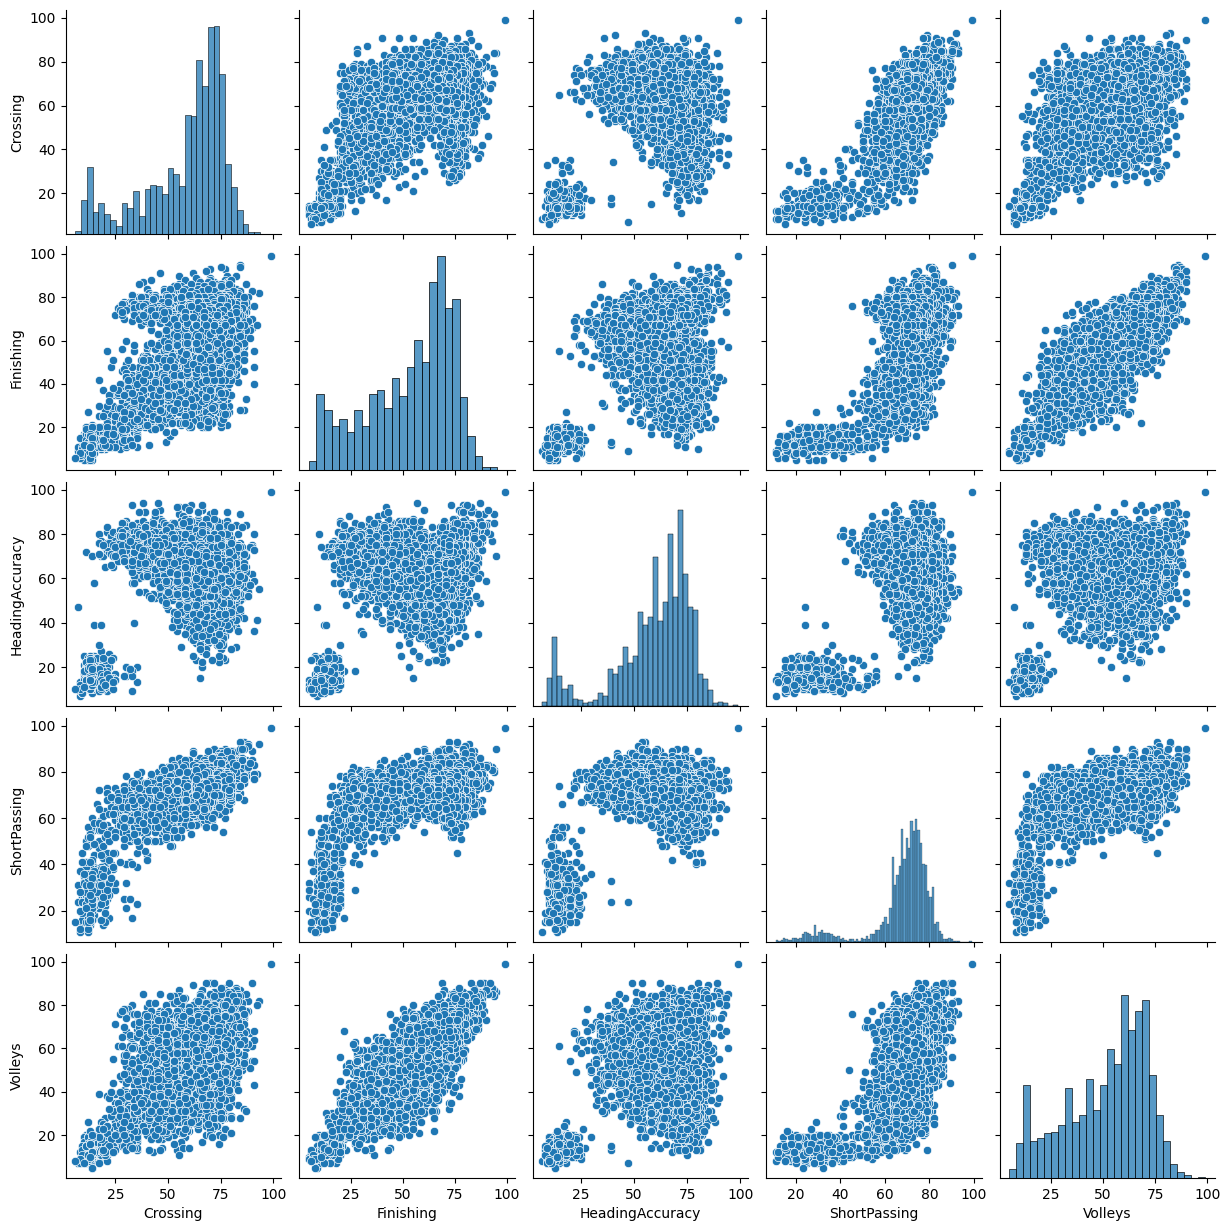

In [ ]:
sns.pairplot(df_skills[skills_ratings[0:5]])

In [ ]:
#data=[]
bool_crack=df_n["Overall"] > 85 #diferenciamos a los mejores jugadores

#Elegimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5] #5,  2 ..
skill_2=skills_ratings[15]  #15, 29, 4 ..

Gráfica con matplotlib.pyplot, liviana pero más sencilla

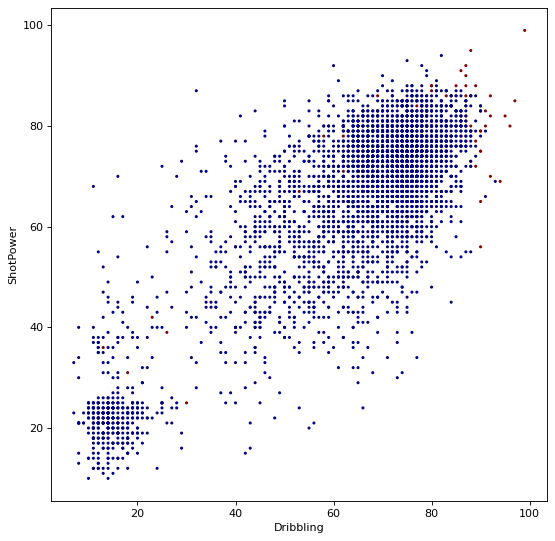

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_crack,cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

Gráfica con Plotly, más completa e interactiva pero un poco pesada

In [ ]:
#Elejimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[15]

In [ ]:
graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'Club'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)


In [ ]:
#En Colab
fig.show(renderer="colab")

In [ ]:
#En Jupyter Ntb abre en otra ventana,
#plot(fig)

'temp-plot.html'

In [ ]:
#en Jupyter Ntb, abre en la ntb
#iplot(fig)

**Consigna de trabajo:** buscar agrupamientos de jugadores de manera intuitiva por cercanía (en espacios bidimensionales, de a dos variables por vez).

Que siginifica cercanía? cómo se mide? en que espacio/s están buscando?

Si se encuentran, tratar de explicarlos visualmente.

-----------------------------------------------------
En próxima gráfica, similar a la anterior, también se diferencian los mejores jugadores y alguna característica/variable de interés (que pueden cambiar)

Se puede ubicar también un jugador en particular. Con la siguiente linea de comando, por ejemplo, Leo Messi:

In [ ]:
#P/Gráfico 2

#Elegimos un jugador
Jugador_elegido=df_n["Name"]=='L. Messi'
#Jugador_elegido=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro

bool_crack=df_n["Overall"] > 85

bool_elecc=df_n["Position"]=='CB'  #CB= Cornerback

bool_no_crack=df_n["Overall"]<86
bool_machinegun=df_n["Name"]=='MachineGun'
#bool_elecc=df_n["Name"]=='JugadorPromedio'

#Elegir dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[4]  #6 , 2
skill_2=skills_ratings[15]  #25, 4

Gráfica con plotly

In [ ]:
palette=['navy','red','#A2D5F2','orange','green','pink']

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Jugador Promedio',
                         text=df_n.loc[bool_no_crack,'Name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')

n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'Position'],
                         opacity=0.9,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Jugador perfecto',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


n_Jugador_elegido =go.Scatter(x=df_skills.loc[Jugador_elegido,skill_1], y=df_skills.loc[Jugador_elegido,skill_2],name='Jugador elegido',
                           text=df_n.loc[Jugador_elegido,'Name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,n_Jugador_elegido]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)


In [ ]:
#En Colab
fig.show(renderer="colab")

In [ ]:
#En Jupyter ntb
#plot(fig) #abre y muestra en otra pestaña
#iplot(fig)  #muestra aquí

'temp-plot.html'

**Identifiquemos algunos jugadores por nombre**

In [ ]:
print(df_n.loc[0:43,"Name"])

0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
3                De Gea
4          K. De Bruyne
5             E. Hazard
6             L. Modrić
7             L. Suárez
8          Sergio Ramos
9              J. Oblak
10       R. Lewandowski
11             T. Kroos
12             D. Godín
13          David Silva
14             N. Kanté
15            P. Dybala
16              H. Kane
17         A. Griezmann
18        M. ter Stegen
19          T. Courtois
20      Sergio Busquets
21            E. Cavani
22             M. Neuer
23            S. Agüero
24         G. Chiellini
25            K. Mbappé
26             M. Salah
27             Casemiro
28         J. Rodríguez
29           L. Insigne
30                 Isco
31           C. Eriksen
32             Coutinho
33        P. Aubameyang
34           M. Hummels
35              Marcelo
36              G. Bale
37            H. Lloris
38           G. Higuaín
39         Thiago Silva
40        S. Handanovič
41            G.